# Homework 1 Answer Key

### Import Some Useful Functions

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams.update({'font.size': 15}) #this changes all the font sizes

### Provided Functions

In [124]:
from numpy import cos,sin
def T_matrix(theta):
    "Transformation matrix to rotate stress in 2D (stress represented as a 3x1 vector)"
    T = np.zeros((3,3))
    T[0,0] =  T[1,1] = cos(theta)**2
    T[0,1] =  T[1,0] = sin(theta)**2
    T[0,2] =  2*cos(theta)*sin(theta)
    T[1,2] = -2*cos(theta)*sin(theta)
    T[2,0] = -cos(theta)*sin(theta)
    T[2,1] =  cos(theta)*sin(theta)
    T[2,2] =  cos(theta)**2 - sin(theta)**2
    return T

def Tp_matrix(theta):
    "Transformation matrix to rotate strain in 2D (stress represented as a 3x1 vector)"
    Tp = np.zeros((3,3))
    Tp[0,0] =  Tp[1,1] = cos(theta)**2
    Tp[0,1] =  Tp[1,0] = sin(theta)**2
    Tp[0,2] =  cos(theta)*sin(theta)
    Tp[1,2] =  -cos(theta)*sin(theta)
    Tp[2,0] =  -2*cos(theta)*sin(theta)
    Tp[2,1] =  2*cos(theta)*sin(theta)
    Tp[2,2] =  cos(theta)**2 - sin(theta)**2
    return Tp

### Question 3

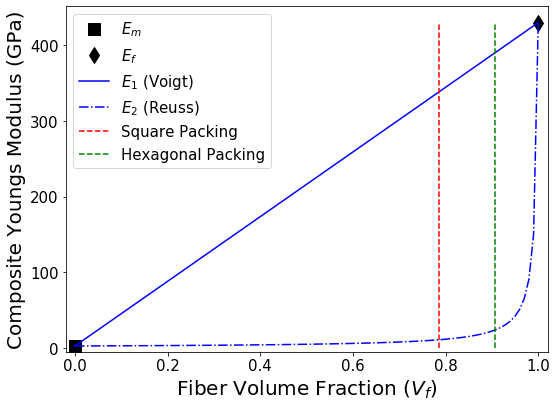

In [125]:
# Material Properties
Ef = 430  #GPa
Em = 2.3  #GPa
V = np.linspace(0,1,100) #Linear space from 0-1 with 100 intervals

# Stiffness Bounds
E1 = V*Ef + (1-V)*Em #Voigt
E2 = ((V/Ef)+((1-V)/Em))**-1 #Reuss

# Volume Fraction
vSqr = np.pi/4
vHex = np.pi*3**0.5/6

# Plot the Results
plt.figure(1,figsize=(8,6))
plt.plot(0, Em, 'ks', ms=12, label=r'$E_{m}$')
plt.plot(1, Ef, 'kd', ms=12, label=r'$E_{f}$')
plt.plot(V, E1, 'b-', label='$E_1$ (Voigt)')
plt.plot(V, E2, 'b-.', label='$E_2$ (Reuss)')
plt.plot([vSqr,vSqr], [0,Ef], 'r--', label='Square Packing')
plt.plot([vHex,vHex], [0,Ef], 'g--', label='Hexagonal Packing')
plt.xlabel('Fiber Volume Fraction ($V_f$)',fontsize=20)
plt.ylabel('Composite Youngs Modulus (GPa)',fontsize=20)
plt.xlim(left=-0.02,right=1.02)
plt.ylim(bottom=-5,top=1.05*Ef)
plt.legend()
plt.tight_layout()
plt.savefig('Q1-3_StiffnessBounds')

### Question 4

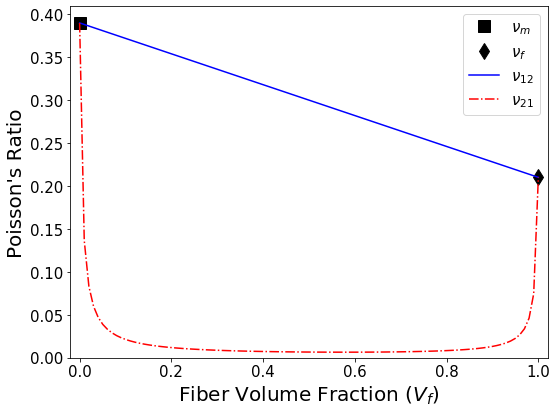

In [126]:
# Note: V, Ef and Em are from the previous cell
# Material Properties
vf = 0.21
vm = 0.39

# Calculate Poisson's Ratios
v12 = (1-V)*vm + V*vf
v21 = v12*E2/E1

#Plot the Results
plt.figure(1,figsize=(8,6))
plt.plot(0, vm, 'ks', ms=12, label=r'$\nu_{m}$')
plt.plot(1, vf, 'kd', ms=12, label=r'$\nu_{f}$')
plt.plot(V, v12, 'b-', label=r'$\nu_{12}$')
plt.plot(V, v21, 'r-.', label=r'$\nu_{21}$')
plt.xlabel('Fiber Volume Fraction ($V_f$)',fontsize=20)
plt.ylabel("Poisson's Ratio",fontsize=20)
plt.xlim(left=-0.02,right=1.02)
plt.ylim(bottom=0,top=1.05*vm)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Q1-4_Poisson')

### Question 5

In [127]:
C = np.array([[121.9,3.4,0],[3.4,11.4,0],[0,0,3.0]]) #GPa
e = np.array([0.01, 0.005, 0.005])
s = C.dot(e) #GPa
print(s)

[1.236 0.091 0.015]


### Question 6

In [128]:
# Define some constants
sApp = np.array([10,5,0])*1e-3 #GPa
th = np.pi/6
T = T_matrix(th)
Tp = Tp_matrix(th)

# Calculate elastic constants
S = np.linalg.inv(C)
Sp = np.linalg.inv(Tp).dot(S).dot(T)

# Calculate strain
eTow = Sp.dot(sApp)
print(eTow*1e6) #microstrain

[ 488.03606415  100.18322328 -771.59484673]


### Functions for Questions 7 and 8

In [129]:
def transIsoStiffnessReuss(E1, nu1, E2, nu2, V):
    '''Return the 2D stiffness tensor of a transversely isotropic composite made from materials 1 and 2. 
       Inputs required are the stiffness and Poisson's ratio of both materials (E1, nu1, E2, nu2) and 
       volume fraction V of material 1. Properties are calculates according to a Ruess bound.'''

    # Calculate Base Material Properties
    G1 = E1/(2*(1+nu1))
    G2 = E2/(2*(1+nu2))

    # Calculate Composite Properties
    Ex = E1*V + E2*(1-V) #Voigt
    Ey = 1/(V/E1+(1-V)/E2) #Reuss
    Gxy = 1/(V/G1+(1-V)/G2) #Reuss
    nuxy = nu1*V+nu2*(1-V) #Voigt
    nuyx = nuxy*Ey/Ex #Reciprocal
    
    # Create Stiffness Matrix
    C = [[Ex/(1-nuxy*nuyx),      nuyx*Ex/(1-nuxy*nuyx), 0],
         [nuyx*Ex/(1-nuxy*nuyx), Ey/(1-nuxy*nuyx),      0],
         [0,                     0,                     Gxy]]
    
    # Return Stiffness Matrix
    return np.array(C)
#

def transIsoStiffnessHT(E1, nu1, E2, nu2, V):
    '''Return the 2D stiffness tensor of a transversely isotropic composite made from materials 1 and 2. 
       Inputs required are the stiffness and Poisson's ratio of both materials (E1, nu1, E2, nu2) and 
       volume fraction V of material 1. Properties are calculates according to a Halpin-Tsai bound.'''

    # Calculate Base Material Properties
    G1 = E1/(2*(1+nu1))
    G2 = E2/(2*(1+nu2))
    
    #Calculate HT Constants
    etaE = ((E1/E2)-1)/((E1/E2)+2)
    etaG = ((G1/G2)-1)/((G1/G2)+1)
    
    # Calculate Composite Properties
    Ex = E1*V + E2*(1-V) #Voigt
    Ey = E2*(1 + 2*etaE*V)/(1 - etaE*V) #HT
    Gxy = G2*(1 + 1*etaG*V)/(1 - etaG*V) #HT
    nuxy = nu1*V+nu2*(1-V) #Voigt
    nuyx = nuxy*Ey/Ex #Reciprocal
    
    # Create Stiffness Matrix
    C = [[Ex/(1-nuxy*nuyx),      nuyx*Ex/(1-nuxy*nuyx), 0],
         [nuyx*Ex/(1-nuxy*nuyx), Ey/(1-nuxy*nuyx),      0],
         [0,                     0,                     Gxy]]
    
    # Return Stiffness Matrix
    return np.array(C)
#

### Question 7

In [130]:
from numpy.linalg import inv

# Define Properties
Ef = 196 #GPa
Em = 68 #GPa
nuf = 0.14
num = 0.33
Vf = 0.5

# Calculate Tensors
CR = transIsoStiffnessReuss(Ef, nuf, Em, num, Vf)
CHT = transIsoStiffnessHT(Ef, nuf, Em, num, Vf)
SR = inv(CR)
SHT = inv(CHT)

# Print Results
print('Reuss Stiffness:\n',np.round(CR,1),'\n')
print('Halpin-Tsai Stiffness:\n',np.round(CHT,1),'\n')
print('Reuss Compliance:\n',np.round(SR,5),'\n')
print('Halpin-Tsai Compliance:\n',np.round(SHT,5))

Reuss Stiffness:
 [[137.8  24.8   0. ]
 [ 24.8 105.4   0. ]
 [  0.    0.   39.4]] 

Halpin-Tsai Stiffness:
 [[138.8  28.8   0. ]
 [ 28.8 122.7   0. ]
 [  0.    0.   44.5]] 

Reuss Compliance:
 [[ 0.00758 -0.00178  0.     ]
 [-0.00178  0.0099   0.     ]
 [ 0.       0.       0.02538]] 

Halpin-Tsai Compliance:
 [[ 0.00758 -0.00178  0.     ]
 [-0.00178  0.00857  0.     ]
 [ 0.       0.       0.02245]]


### Question 8

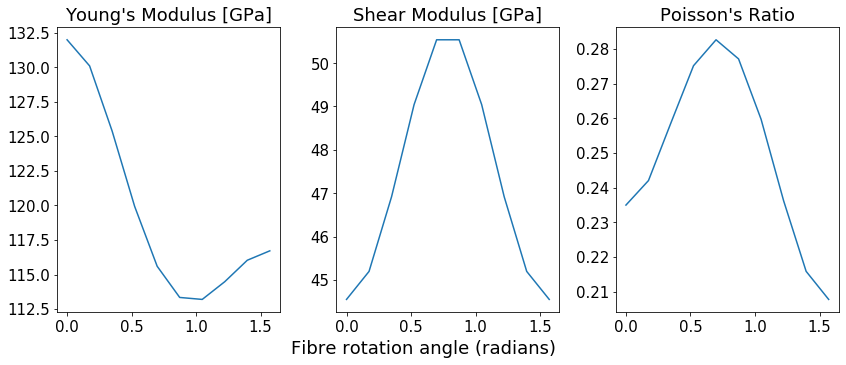

In [146]:
# Define angles
th = np.linspace(0,np.pi/2,10)

# Calculate Effective Properties
Ex = []; Gxy = []; vxy = []
for x in th:
    # Rotate tensor
    T = T_matrix(x)
    Tp = Tp_matrix(x)
    Sp = np.linalg.inv(Tp).dot(SHT).dot(T)
    
    # Effective properties
    Ex += [1/Sp[0,0]]
    Gxy += [1/Sp[2,2]]
    vxy += [-Sp[0,1]/Sp[0,0]]

# Plot Results
fig, axs = plt.subplots(1,3, figsize=(12,5))
axs[0].plot(th, Ex)
axs[0].set_title("Young's Modulus [GPa]")
axs[1].plot(th, Gxy)
axs[1].set_title('Shear Modulus [GPa]')
axs[2].plot(th, vxy)
axs[2].set_title("Poisson's Ratio")
fig.suptitle('Fibre rotation angle (radians)',y=0.03)
plt.tight_layout()
plt.savefig('Q1-8_EffectiveProperties')